In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from scipy.stats import binned_statistic, binned_statistic_2d

import warnings
import util_small as util

warnings.filterwarnings('ignore')

In [2]:
# --- begin user input ---
# comp_name = "tracers_nuc"
ndays = 10  # number of days to plot (last ndays of simulations)
# --- end user input ---

# runs, run_names, colors = util.get_comp_names(comp_name)
runs, run_names, colors = ["lp05.P3_hom_t_atm_iulog_debug", "cooper.P3_hom_debug"],["LP05","Default"],['C0', 'C2']

run_dir = "/glade/derecho/scratch/sturbeville/DPSCREAM_simulations/dpscreamv0_RCE_SMALL."
print(run_names)
file_names = [ f"{run_dir}{runs[i]}/run/dpscreamv0_RCE_SMALL.{runs[i]}.eam.h0.2000-01-01-00000.nc" for i in range(len(runs))]
print(file_names[-1])

['LP05', 'Default']
/glade/derecho/scratch/sturbeville/DPSCREAM_simulations/dpscreamv0_RCE_SMALL.cooper.P3_hom_debug/run/dpscreamv0_RCE_SMALL.cooper.P3_hom_debug.eam.h0.2000-01-01-00000.nc


In [3]:
# load data
var_list = ['P3_hom_frz_ni_tend','P3_lp05_hom_ni_tend',
            'P3_nc2ni_immers_frz_tend','P3_lp05_imm_ni_tend',
            'P3_nr2ni_immers_frz_tend','P3_lp05_mix_ni_tend'
            ] # ,'P3_lp05_nuc_ni_tend']
            # 'NUMICE','NUMLIQ','NUMRAI',
            # 'CLDICE','CLDLIQ','RAINQM']

ds = xr.open_dataset(file_names[-1])[var_list+['T','Q','RELHUM','CLDICE','CLDLIQ','RAINQM', 'P3_hom_t_atm']]
ds

<xarray.Dataset> Size: 354MB
Dimensions:                   (time: 41, lev: 128, ncol: 1296)
Coordinates:
  * lev                       (lev) float64 1kB 2.58 3.23 3.88 ... 994.9 998.5
  * time                      (time) object 328B 2000-01-01 00:00:00 ... 2000...
Dimensions without coordinates: ncol
Data variables: (12/13)
    P3_hom_frz_ni_tend        (time, lev, ncol) float32 27MB ...
    P3_lp05_hom_ni_tend       (time, lev, ncol) float32 27MB ...
    P3_nc2ni_immers_frz_tend  (time, lev, ncol) float32 27MB ...
    P3_lp05_imm_ni_tend       (time, lev, ncol) float32 27MB ...
    P3_nr2ni_immers_frz_tend  (time, lev, ncol) float32 27MB ...
    P3_lp05_mix_ni_tend       (time, lev, ncol) float32 27MB ...
    ...                        ...
    Q                         (time, lev, ncol) float32 27MB ...
    RELHUM                    (time, lev, ncol) float32 27MB ...
    CLDICE                    (time, lev, ncol) float32 27MB ...
    CLDLIQ                    (time, lev, ncol) float32 27MB ...
    RAINQM                    (time, lev, ncol) float32 27MB ...
    P3_hom_t_atm              (time, lev, ncol) float32 27MB ...
Attributes: (12/19)
    ne:                30
    np:                4
    title:             EAM History file information
    source:            E3SM Atmosphere Model
    source_id:         97c6f525aa
    product:           model-output
    ...                ...
    institution_id:    E3SM-Project
    institution:       LLNL (Lawrence Livermore National Laboratory, Livermor...
    contact:           e3sm-data-support@listserv.llnl.gov
    initial_file:      /glade/work/sturbeville/E3SM/inputdata/atm/cam/inic/ho...
    topography_file:   /glade/work/sturbeville/E3SM/inputdata/atm/cam/topo/US...
    time_period_freq:  hour_6

## plot histograms

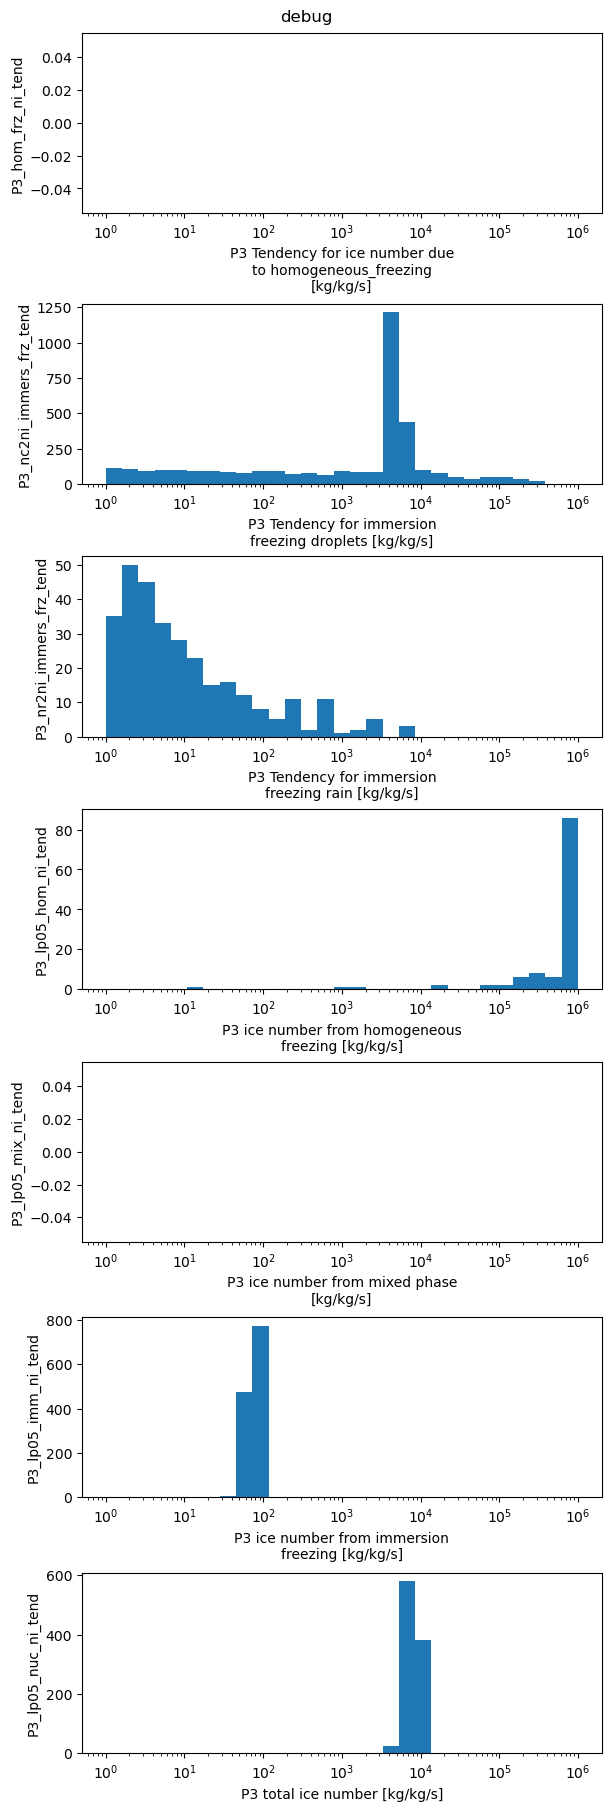

In [15]:
# plot histograms for all runs
for j in range(1,2):
    fig = plt.figure(figsize=(6,18), constrained_layout=True)
    # ds = (xr.open_dataset(file_names[j])[var_list]).isel(time=slice(-20,-1))
    for i,var in enumerate(var_list):
        ax = fig.add_subplot(len(var_list),1,i+1)
        ds[var].where(ds[var]>0).plot.hist(ax=ax, bins=np.logspace(0,6,30))
        ax.set(xscale='log', ylabel=var)
    fig.suptitle(run_names[j])
    plt.savefig(f"../plots/nuc_tend/small_{runs[j]}.png")
    plt.show()


In [8]:
# var_list = ['P3_nc2ni_immers_frz_tend', 'P3_nr2ni_immers_frz_tend',
#             'P3_ntend_homfrz', 'P3_nnuc_hom','P3_nnuc_mix','P3_nnuc_imm']


In [12]:
# plot frac of nucleation as a function of height
fig = plt.figure(figsize=(20,6), constrained_layout=True)
k = 0
for j in [0]:
    k += 1
    # ds = xr.open_dataset(file_names[j])[var_list+['Z3','T','P3_ni_nucleat_tend']]#.isel(time=slice(-4*ndays,-1))
    print(str(ds.time[0].values))
    # total_nuc = (np.sum(np.where(ds['P3_nc2ni_immers_frz_tend']>0,1,0), axis=(0,2))+
    #              np.sum(np.where(ds['P3_nr2ni_immers_frz_tend']>0,1,0), axis=(0,2))+
    #              np.sum(np.where(ds['P3_ntend_homfrz']>0,1,0), axis=(0,2)) +
    #              np.sum(np.where(ds['P3_ni_nucleat_tend']>0,1,0), axis=(0,2)))
    total_nuc = (np.sum(ds['P3_nc2ni_immers_frz_tend'], axis=(0,2))+
                 np.sum(ds['P3_nr2ni_immers_frz_tend'], axis=(0,2))+
                 np.sum(ds['P3_ntend_homfrz'], axis=(0,2)) +
                 np.sum(ds['P3_ni_nucleat_tend'], axis=(0,2)))
    ax = fig.add_subplot(1,4,k)
    z_plot = ds['Z3'].mean(dim=['time','ncol'])/1000
    for i,var in enumerate(var_list):
        # ax.plot(np.sum(np.where(ds[var]>0,1,0),axis=(0,2))/total_nuc,
        ax.plot(np.sum(ds[var],axis=(0,2))/total_nuc,
                z_plot, label=var)
    ax.set(title=run_names[j], ylim=[0,18],
           ylabel='Height (km)', xlabel='NI nuc tend fraction of total nuc')
    axt = ax.twiny()
    axt.plot(ds['T'].mean(dim=['time','ncol'])-273.15, z_plot, 'k--', label="Temperature")
    ax.legend()
# fig.suptitle(run_names[j])
plt.savefig(f"../plots/nuc_tend/small_frac-ni-nuc-types_cooplp.png")
plt.show()

2000-01-01 00:00:00


KeyError: "No variable named 'P3_ntend_homfrz'. Variables on the dataset include ['P3_hom_frz_ni_tend', 'P3_hom_ni_comp_tend', 'P3_nc2ni_immers_frz_tend', 'P3_nr2ni_immers_frz_tend', 'P3_lp05_hom_ni_tend', ..., 'CLDICE', 'CLDLIQ', 'RAINQM', 'lev', 'time']"

<Figure size 2000x600 with 0 Axes>

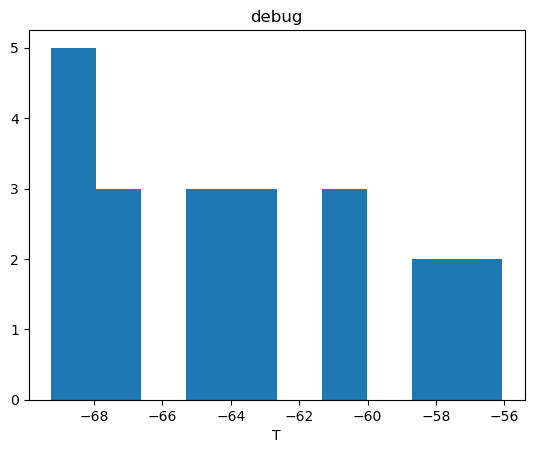

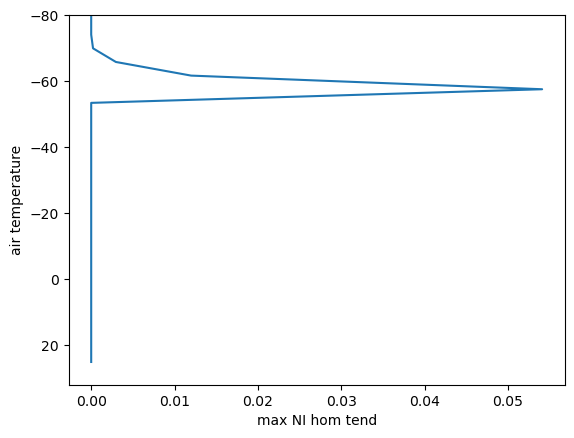

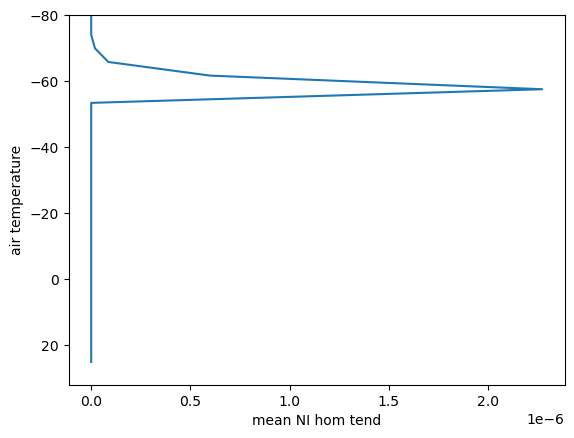

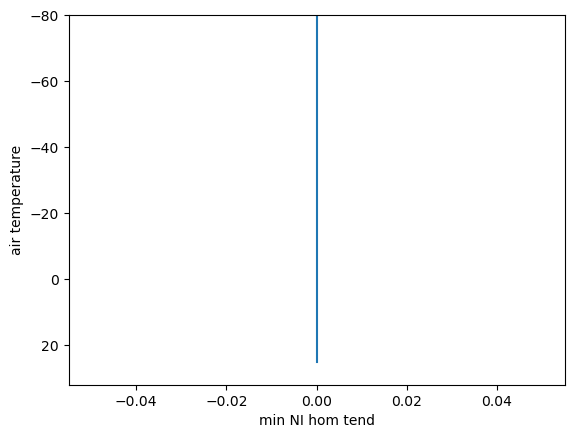

In [22]:
ds = xr.open_dataset(file_names[-1])[var_list+['Z3','T']]#.isel(time=slice(-4*5,-1))
temp_hom = (ds['T']-273.15).where(ds.P3_hom_frz_ni_tend>0)
temp_hom.plot.hist()
# plt.yscale('log')
plt.title(run_names[-1])
plt.show()

var='P3_hom_frz_ni_tend'
stat='max'

ds_var = ds[var].where(ds[var]>=0)
binned_ni_hom, bin_edges,_ = binned_statistic(ds['T'].values.flatten(),
                                              ds_var.values.flatten(),
                                              bins=30, statistic=stat)
bin_mids = (bin_edges[1:]+bin_edges[:-1])/2
plt.plot(binned_ni_hom, bin_mids-273.15)
plt.xlabel(f'{stat} NI hom tend')
plt.ylabel('air temperature')
plt.ylim([32,-80])
plt.show()

stat='mean'
binned_ni_hom, bin_edges,_ = binned_statistic(ds['T'].values.flatten(),
                                              ds_var.values.flatten(),
                                              bins=30, statistic=stat)
bin_mids = (bin_edges[1:]+bin_edges[:-1])/2
plt.plot(binned_ni_hom, bin_mids-273.15)
plt.xlabel(f'{stat} NI hom tend')
plt.ylabel('air temperature')
plt.ylim([32,-80])
plt.show()

stat='min'
binned_ni_hom, bin_edges,_ = binned_statistic(ds['T'].values.flatten(),
                                              ds_var.values.flatten(),
                                              bins=30, statistic=stat)
bin_mids = (bin_edges[1:]+bin_edges[:-1])/2
plt.plot(binned_ni_hom, bin_mids-273.15)
plt.xlabel(f'{stat} NI hom tend')
plt.ylabel('air temperature')
plt.ylim([32,-80])
plt.show()


## plot temp vs RHice histograms

In [4]:
var_list

['P3_hom_frz_ni_tend',
 'P3_lp05_hom_ni_tend',
 'P3_nc2ni_immers_frz_tend',
 'P3_lp05_imm_ni_tend',
 'P3_nr2ni_immers_frz_tend',
 'P3_lp05_mix_ni_tend']

In [5]:
len(var_list)//2+len(var_list)%2

3

Default cooper.P3_hom_debug
0 P3_hom_frz_ni_tend
... flattened temp and rhice arrays, get hist2d...
... got hist, n = 141, plotting...
1 P3_nr2ni_immers_frz_tend
... flattened temp and rhice arrays, get hist2d...
... got hist, n = 36, plotting...
2 P3_nc2ni_immers_frz_tend
... flattened temp and rhice arrays, get hist2d...
... got hist, n = 1924, plotting...


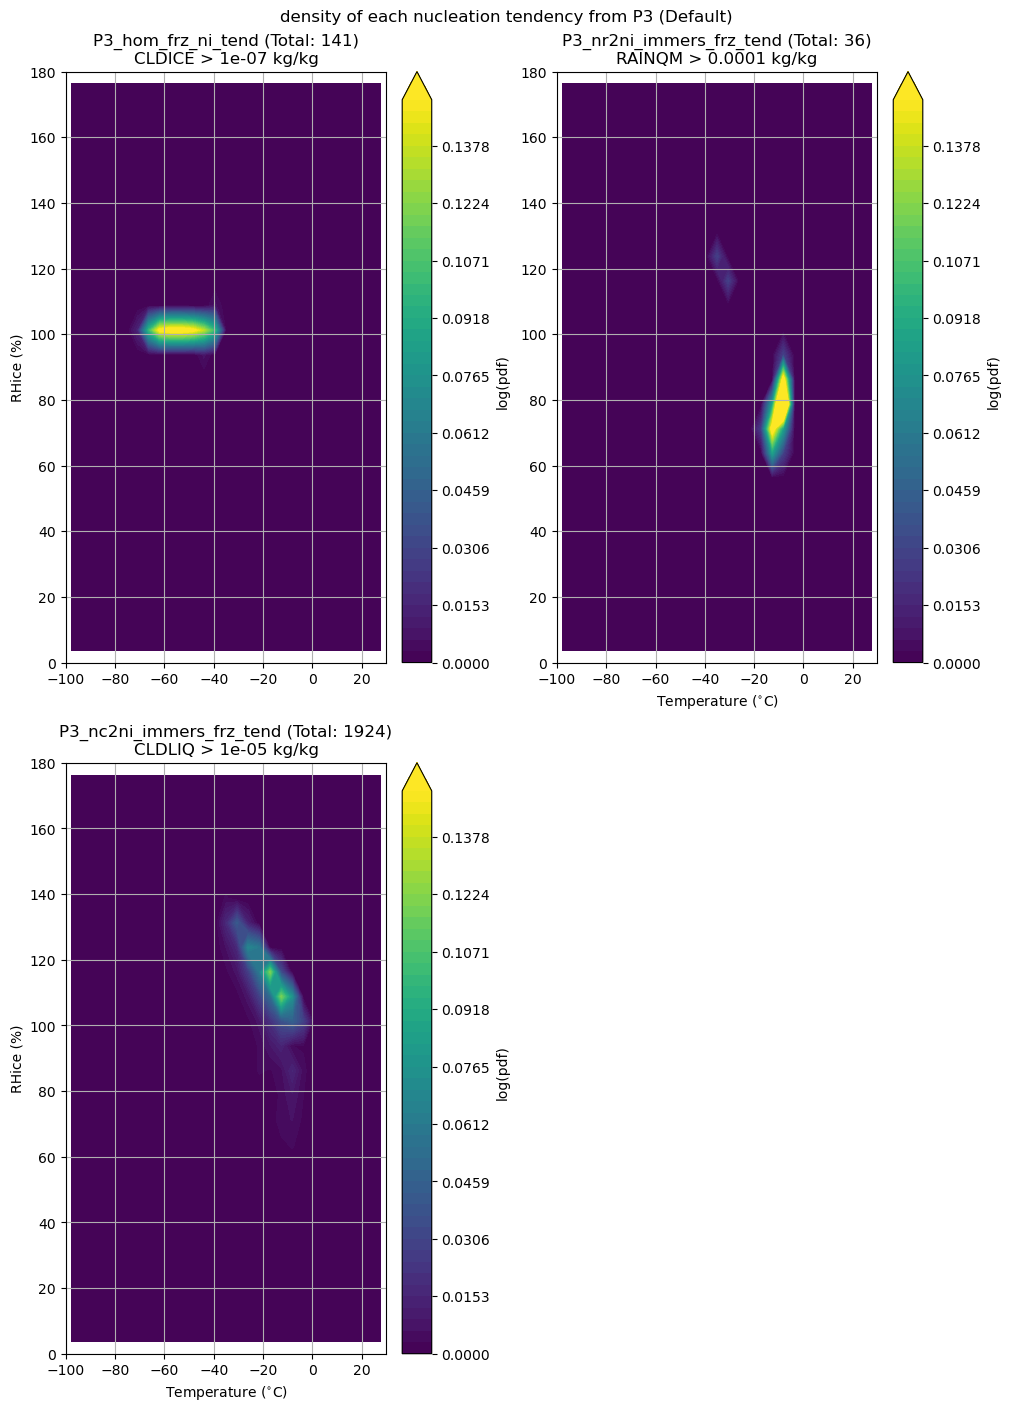

In [21]:
j = 1
qsmall=1e-7
stat="count"
ice_var="respective"

if ice_var=="total":
    ds = xr.open_dataset(file_names[j])[var_list+['T','RELHUM','Q','CLDICE','CLDLIQ','RAINQM']]#.isel(time=slice(0,13))
    ds['total'] = ds['CLDICE']+ds['CLDLIQ']+ds['RAINQM']

elif ice_var=="respective":
    ds = xr.open_dataset(file_names[j])[var_list+['T','RELHUM','Q','CLDICE','CLDLIQ','RAINQM']]#.isel(time=slice(0,13))
    ds_liq = ds['CLDLIQ']
    ds_rai = ds['RAINQM']
else:
    ds = xr.open_dataset(file_names[j])[var_list+['T','RELHUM','Q',ice_var]]
fig = plt.figure(figsize=(10,14), constrained_layout=True)
print(run_names[j], runs[j])
for i in range(len(var_list)):
    stat="count"
    print(i, var_list[i])
    ax = fig.add_subplot(len(var_list)//2+len(var_list)%2,2,i+1)
    # ds_plot = ds.where((ds['CLDICE']>1e-7)|(ds['CLDLIQ']>1e-5)|(ds['RAINQM']>1e-4))
    temp_flat = (ds['T']-273.15).values.flatten()
    rhice_flat = util.calc_rhice(ds).values.flatten()
    print('... flattened temp and rhice arrays, get hist2d...')
    if (ice_var=="respective") & (var_list[i]=="P3_nc2ni_immers_frz_tend"):
        cld_flat = ds_liq.values.flatten()  # .where((ds['CLDICE']>1e-7))
        qsmall=1e-5
        cld_type="CLDLIQ"
    elif (ice_var=="respective") & (var_list[i]=="P3_nr2ni_immers_frz_tend"):
        cld_flat = ds_rai.values.flatten()  # .where((ds['CLDICE']>1e-7))
        qsmall=1e-4
        cld_type = "RAINQM"
    else:
        cld_flat = ds['CLDICE'].values.flatten()  # .where((ds['CLDICE']>1e-7))
        qsmall=1e-7
        cld_type = "CLDICE"
    var_flat = ds[var_list[i]].values.flatten()
    # var_flat = ds_plot.where(ds_plot>qsmall).values.flatten()
    temp_flat = np.where((var_flat>qsmall)&(cld_flat>qsmall), temp_flat, np.nan)
    rhice_flat = np.where((var_flat>qsmall)&(cld_flat>qsmall), rhice_flat, np.nan)
    hist2d, xedges, yedges, _ = binned_statistic_2d(temp_flat, rhice_flat,
                                                    var_flat,
                                                    statistic=stat,
                                                    bins=[np.linspace(-100,30,30),
                                                          np.linspace(0,180,25)]
                                                   )
    n = np.sum(np.where((var_flat>qsmall)&(cld_flat>qsmall),1,0))
    hist2d = hist2d/n
    stat="density"
    print(f'... got hist, n = {n}, plotting...')
    xmids = (xedges[1:]+xedges[:-1])/2
    ymids = (yedges[1:]+yedges[:-1])/2
    if stat=="count" or stat=="density":
        cmap="viridis"
        # levs = np.linspace(1,41,20)
        levs = np.linspace(0,0.15)
    elif stat=="mean" or stat=="median":
        cmap="cividis"
        hist2d = np.log10(hist2d)
        levs = np.linspace(-6,6,30)
    else:
        cmap="Purples"
    im = ax.contour(xmids, ymids, (hist2d.T), cmap=cmap, levels=levs, extend="max") #np.linspace(-6,-0.5,10))
    plt.colorbar(im, ax=ax, label="log(pdf)")
    ax.set(ylim=[0,180], xlim=[-100,30], title=f"{var_list[i]} (Total: {n})\n{cld_type} > {qsmall} kg/kg")
    ax.grid(True)
    if i%2 == 0:
        ax.set(ylabel="RHice (%)")
    if (i>=len(var_list)-2):
        ax.set(xlabel="Temperature ($^{\circ}$C)")
# stat="density"
fig.suptitle(f"{stat} of each nucleation tendency from P3 ({run_names[j]})")
plt.savefig(f"../plots/nuc_tend/temp_rhice_jhist_per_nuc_type_{runs[j]}_{stat}_{ice_var}_gt_{qsmall}.png")
plt.show()

LP05 lp05.P3_hom_t_atm_iulog_debug
0 P3_lp05_hom_ni_tend
... flattened temp and rhice arrays, get hist2d...
... got hist, n = 1153, plotting...
Oranges
1 P3_lp05_imm_ni_tend
... flattened temp and rhice arrays, get hist2d...
... got hist, n = 4466, plotting...
Greens
2 P3_lp05_mix_ni_tend
... flattened temp and rhice arrays, get hist2d...
... got hist, n = 1946, plotting...
Greys
3 P3_nc2ni_immers_frz_tend
... flattened temp and rhice arrays, get hist2d...
... got hist, n = 2276, plotting...
Blues
4 P3_nr2ni_immers_frz_tend
... flattened temp and rhice arrays, get hist2d...
... got hist, n = 40, plotting...
Purples
5 P3_hom_frz_ni_tend
... flattened temp and rhice arrays, get hist2d...
... got hist, n = 143, plotting...
Reds


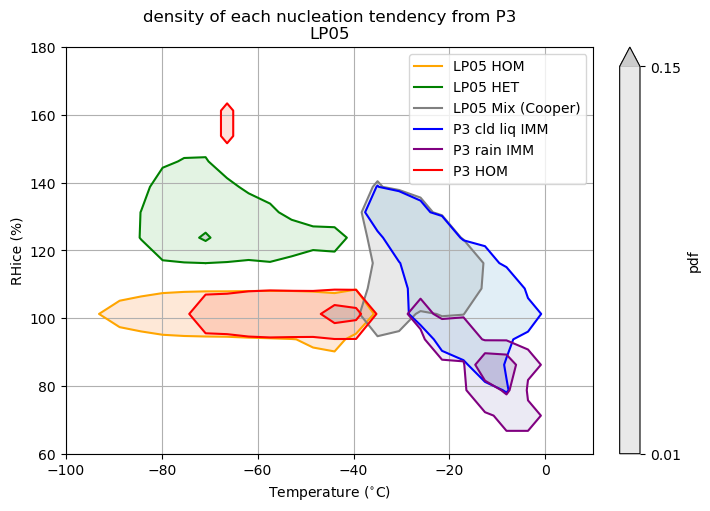

In [55]:
# all on one axes
# var_list = ['P3_nc2ni_immers_frz_tend',
#             'P3_nr2ni_immers_frz_tend',
#             'P3_hom_frz_ni_tend']
# var_list = ['P3_ni_nucleat_tend']
# var_list = ['P3_lp05_mix_ni_tend',
#             'P3_lp05_imm_ni_tend',
#             'P3_lp05_hom_ni_tend']
var_list = ['P3_lp05_hom_ni_tend',
            'P3_lp05_imm_ni_tend',
            'P3_lp05_mix_ni_tend',
            'P3_nc2ni_immers_frz_tend',
            'P3_nr2ni_immers_frz_tend',
            'P3_hom_frz_ni_tend']
labels = ['LP05 HOM',
          'LP05 HET',
          'LP05 Mix (Cooper)',
          'P3 cld liq IMM',
          'P3 rain IMM',
          'P3 HOM'
         ]
cmaps = ["Oranges","Greens","Greys","Blues","Purples","Reds"]

j = 0
qsmall=1e-7
nsmall=1e-10
stat="count"
ice_var="respective"

if j==1:
    var_list = var_list[3:]
    labels = labels[3:]
    cmaps = cmaps[3:]
if ice_var=="total":
    ds = xr.open_dataset(file_names[j])[var_list+['T','RELHUM','Q','CLDICE','CLDLIQ','RAINQM']]
    ds['total'] = ds['CLDICE']+ds['CLDLIQ']+ds['RAINQM']
elif ice_var=="respective":
    ds = xr.open_dataset(file_names[j])[var_list+['T','RELHUM','Q','CLDICE','CLDLIQ','RAINQM']]#.isel(time=slice(0,13))
    ds_liq = ds['CLDLIQ']
    ds_rai = ds['RAINQM']
else:
    ds = xr.open_dataset(file_names[j])[var_list+['T','RELHUM','Q',ice_var]]
fig, ax = plt.subplots(1,1,figsize=(7,5), constrained_layout=True)
print(run_names[j], runs[j])
im = [None]*len(var_list)
for i in range(len(var_list)):
    stat="count"
    print(i, var_list[i])
    # ds_plot = ds.where((ds['CLDICE']>1e-7)|(ds['CLDLIQ']>1e-5)|(ds['RAINQM']>1e-4))
    temp_flat = (ds['T']-273.15).values.flatten()
    rhice_flat = util.calc_rhice(ds).values.flatten()
    print('... flattened temp and rhice arrays, get hist2d...')
    if (ice_var=="respective") & (var_list[i]=="P3_nc2ni_immers_frz_tend"):
        cld_flat = ds_liq.values.flatten()  # .where((ds['CLDICE']>1e-7))
        qsmall=1e-5
        cld_type="CLDLIQ"
    elif (ice_var=="respective") & (var_list[i]=="P3_nr2ni_immers_frz_tend"):
        cld_flat = ds_rai.values.flatten()  # .where((ds['CLDICE']>1e-7))
        qsmall=1e-4
        cld_type = "RAINQM"
    else:
        cld_flat = ds['CLDICE'].values.flatten()  # .where((ds['CLDICE']>1e-7))
        qsmall=1e-7
        cld_type = "CLDICE"
    var_flat = ds[var_list[i]].values.flatten()
    # var_flat = ds_plot.where(ds_plot>qsmall).values.flatten()
    temp_flat = np.where((var_flat>qsmall)&(cld_flat>qsmall), temp_flat, np.nan)
    rhice_flat = np.where((var_flat>qsmall)&(cld_flat>qsmall), rhice_flat, np.nan)
    hist2d, xedges, yedges, _ = binned_statistic_2d(temp_flat, rhice_flat,
                                                    var_flat,
                                                    statistic=stat,
                                                    bins=[np.linspace(-100,30,30),
                                                          np.linspace(0,180,25)]
                                                   )
    n = np.sum(np.where((var_flat>qsmall)&(cld_flat>qsmall),1,0))
    hist2d = hist2d/n
    stat="density"
    print(f'... got hist, n = {n}, plotting...')
    xmids = (xedges[1:]+xedges[:-1])/2
    ymids = (yedges[1:]+yedges[:-1])/2
    if stat=="count" or stat=="density":
        cmap=cmaps[i]
        # levs = np.linspace(1,41,20)
        levs = [0.01,0.15]
    elif stat=="mean" or stat=="median":
        cmap="cividis"
        hist2d = np.log10(hist2d)
        levs = np.linspace(-6,6,30)
    else:
        cmap="Purples"
    print(cmap)
    im = ax.contourf(xmids, ymids, (hist2d.T), cmap=cmap, alpha=0.2,
                       levels=levs, extend="max") #np.linspace(-6,-0.5,10))
    ax.contour(xmids, ymids, (hist2d.T), colors=cmap[:-1].lower(),
                       levels=levs)
    ax.plot([0],[0], color=cmap[:-1].lower(), label=labels[i])
    if cmap=="Greys":
        plt.colorbar(im, ax=ax, label="pdf")
if "Greys" not in cmaps:
    plt.colorbar(im, ax=ax, label="pdf")
# if len(var_list)<3:
#     plt.colorbar(im, ax=ax, label=var_list[i]+f" where {cld_type}>{qsmall} kg/kg")
#     plt.colorbar(im, ax=ax, label=var_list[i]+f" where {cld_type}>{qsmall} kg/kg")

ax.set(ylim=[60,180], xlim=[-100,10])
ax.grid(True)
ax.set(ylabel="RHice (%)")
ax.set(xlabel="Temperature ($^{\circ}$C)")
ax.legend()
# stat="density"
ax.set(title=f"{stat} of each nucleation tendency from P3\n{run_names[j]}")
if "lp" in var_list[0]:
    nuc_type = "LP"
elif len(var_list)==1:
    nuc_type = "Cooper"
else:
    nuc_type = "P3"
plt.savefig(f"../plots/nuc_tend/temp_rhice_jhist_per_nuc_type_{runs[j]}_{stat}_{ice_var}_{nuc_type}.png")
plt.show()

In [15]:
t_hom = (ds['P3_hom_t_atm'])
t_hom = t_hom.where(t_hom>-200) # .where(ds['P3_hom_frz_ni_tend']>0)) # get rid of MISSING VALUES = -999
print(t_hom.min().values, t_hom.max().values, t_hom.mean().values, t_hom.count().values)

203.86741638183594 216.98365783691406 209.20672607421875 21


debug lp05.P3_hom_t_atm_iulog_debug
0 CLDICE CLDICE 1e-05
41518.0
1 CLDLIQ CLDLIQ 1e-05
33565.0
2 RAINQM RAINQM 0.0001
2844.0


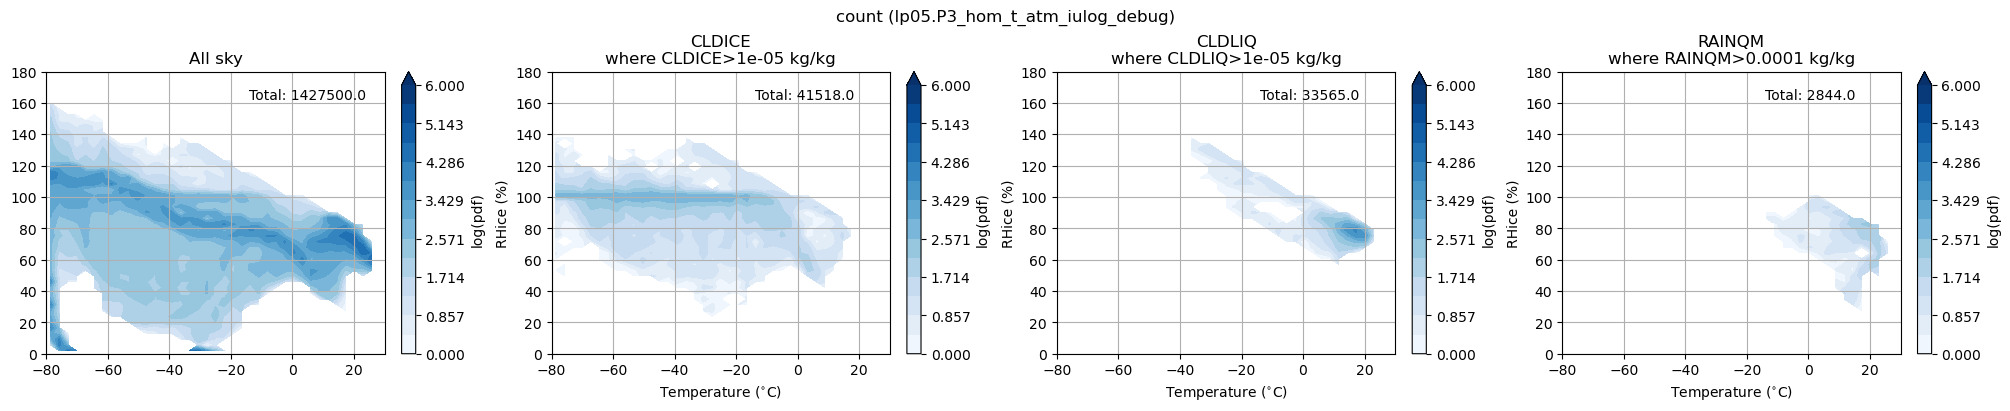

In [10]:
j = -1
stat="count"
save_stat="count"
var_list = ['CLDICE','CLDLIQ','RAINQM']
var_plot_list = ['CLDICE','CLDLIQ','RAINQM']
# var_plot_list = ['NUMICE','NUMLIQ','NUMRAI']
qsmall_list = [1e-5, 1e-5, 1e-4]
ds_plot = xr.open_dataset(file_names[j])[var_plot_list+var_list+['T','RELHUM','Q']]
fig = plt.figure(figsize=(20,4), constrained_layout=True)
print(run_names[j], runs[j])

# flatten temperature and relative humidity arrays for x and y axis
temp_flat = (ds_plot['T']-273.15).values.flatten()
rhice_flat = util.calc_rhice(ds_plot).values.flatten()
n = np.zeros((4))

# get binned_statistic_2d count total all sky
hist2d0, xedges, yedges, _ = binned_statistic_2d(temp_flat,
                                                 rhice_flat, None,
                                                 statistic="count",
                                                 bins=[np.linspace(-80,30,40),
                                                       np.linspace(0,180,50)]
                                                )
n[0] = np.nansum(np.where((temp_flat>=-80)&(temp_flat<=30),1,0))
xmids = (xedges[1:]+xedges[:-1])/2
ymids = (yedges[1:]+yedges[:-1])/2
# plot it
ax0 = fig.add_subplot(1,4,1)
im0 = ax0.contourf(xmids, ymids, np.log10(hist2d0.T), cmap='Blues', levels=np.linspace(0,6,15), extend="max")
plt.colorbar(im0, ax=ax0, label="log(pdf)")
ax0.set(ylim=[0,180], xlim=[-80,30], title=f"All sky")
ax0.annotate(f"Total: {n[0]}", xy=(0.6,0.9), xycoords="axes fraction")
ax0.grid(True)

for i in range(3):
    # get binned_statistic_2d for in-cloud ice mass
    print(i, var_plot_list[i], var_list[i], qsmall_list[i])
    var = ds_plot[var_plot_list[i]].where(ds_plot[var_list[i]]>qsmall_list[i])
    var_flat = var.values.flatten()
    hist2d1, xedges, yedges, _ = binned_statistic_2d(np.where(var_flat>qsmall_list[i], temp_flat, np.nan),
                                                     np.where(var_flat>qsmall_list[i], rhice_flat, np.nan),
                                                     var_flat,
                                                     statistic=stat,
                                                     bins=[np.linspace(-80,30,40),
                                                           np.linspace(0,180,50)]
                                                    )
    n[i+1] = int(np.sum(np.where(ds_plot[var_list[i]]>qsmall_list[i],1,0)))

    # calculate the normalized histogram
    if save_stat=="density":
        hist2d0 = hist2d0/n0

    print(n[i+1])
    
    # for plotting - get x and y bin middle
    xmids = (xedges[1:]+xedges[:-1])/2
    ymids = (yedges[1:]+yedges[:-1])/2

    ax1 = fig.add_subplot(1,4,i+2)
    im1 = ax1.contourf(xmids, ymids, np.log10(hist2d1.T), cmap='Blues', levels=np.linspace(0,6,15), extend="max")
    plt.colorbar(im1, ax=ax1, label="log(pdf)")
    ax1.set(ylim=[0,180], xlim=[-80,30], title=f"{var_plot_list[i]}\nwhere {var_list[i]}>{qsmall_list[i]} kg/kg")
    ax1.annotate(f"Total: {n[i+1]}", xy=(0.6,0.9), xycoords="axes fraction")
    ax1.grid(True)

    ax1.set(ylabel="RHice (%)")
    ax1.set(xlabel="Temperature ($^{\circ}$C)")

fig.suptitle(f"{stat} ({runs[j]})")
plt.savefig(f"../plots/nuc_tend/temp_rhice_jhist_incld_mass_{runs[j]}_{stat}.png")
plt.show()

In [7]:
var_list = ['P3_hom_frz_ni_tend', 'P3_hom_t_atm',
            'P3_nc2ni_immers_frz_tend','P3_nr2ni_immers_frz_tend',
            'P3_lp05_hom_ni_tend', 'P3_lp05_mix_ni_tend',
            'P3_lp05_imm_ni_tend','P3_lp05_nuc_ni_tend',
            'NUMICE','NUMLIQ','NUMRAI',
            'CLDICE','CLDLIQ','RAINQM']
ds = xr.open_dataset(file_names[-1])[var_list+['T','RELHUM','Q','CLDICE']]
print(file_names[-1])
ds

/glade/derecho/scratch/sturbeville/DPSCREAM_simulations/dpscreamv0_RCE_SMALL.lp05.P3_hom_t_atm/run/dpscreamv0_RCE_SMALL.lp05.P3_hom_t_atm.eam.h0.2000-01-01-00000.nc


<xarray.Dataset> Size: 462MB
Dimensions:                   (time: 41, lev: 128, ncol: 1296)
Coordinates:
  * lev                       (lev) float64 1kB 2.58 3.23 3.88 ... 994.9 998.5
  * time                      (time) object 328B 2000-01-01 00:00:00 ... 2000...
Dimensions without coordinates: ncol
Data variables: (12/17)
    P3_hom_frz_ni_tend        (time, lev, ncol) float32 27MB ...
    P3_hom_t_atm              (time, lev, ncol) float32 27MB ...
    P3_nc2ni_immers_frz_tend  (time, lev, ncol) float32 27MB ...
    P3_nr2ni_immers_frz_tend  (time, lev, ncol) float32 27MB ...
    P3_lp05_hom_ni_tend       (time, lev, ncol) float32 27MB ...
    P3_lp05_mix_ni_tend       (time, lev, ncol) float32 27MB ...
    ...                        ...
    CLDICE                    (time, lev, ncol) float32 27MB ...
    CLDLIQ                    (time, lev, ncol) float32 27MB ...
    RAINQM                    (time, lev, ncol) float32 27MB ...
    T                         (time, lev, ncol) float32 27MB ...
    RELHUM                    (time, lev, ncol) float32 27MB ...
    Q                         (time, lev, ncol) float32 27MB ...
Attributes: (12/19)
    ne:                30
    np:                4
    title:             EAM History file information
    source:            E3SM Atmosphere Model
    source_id:         97c6f525aa
    product:           model-output
    ...                ...
    institution_id:    E3SM-Project
    institution:       LLNL (Lawrence Livermore National Laboratory, Livermor...
    contact:           e3sm-data-support@listserv.llnl.gov
    initial_file:      /glade/work/sturbeville/E3SM/inputdata/atm/cam/inic/ho...
    topography_file:   /glade/work/sturbeville/E3SM/inputdata/atm/cam/topo/US...
    time_period_freq:  hour_6

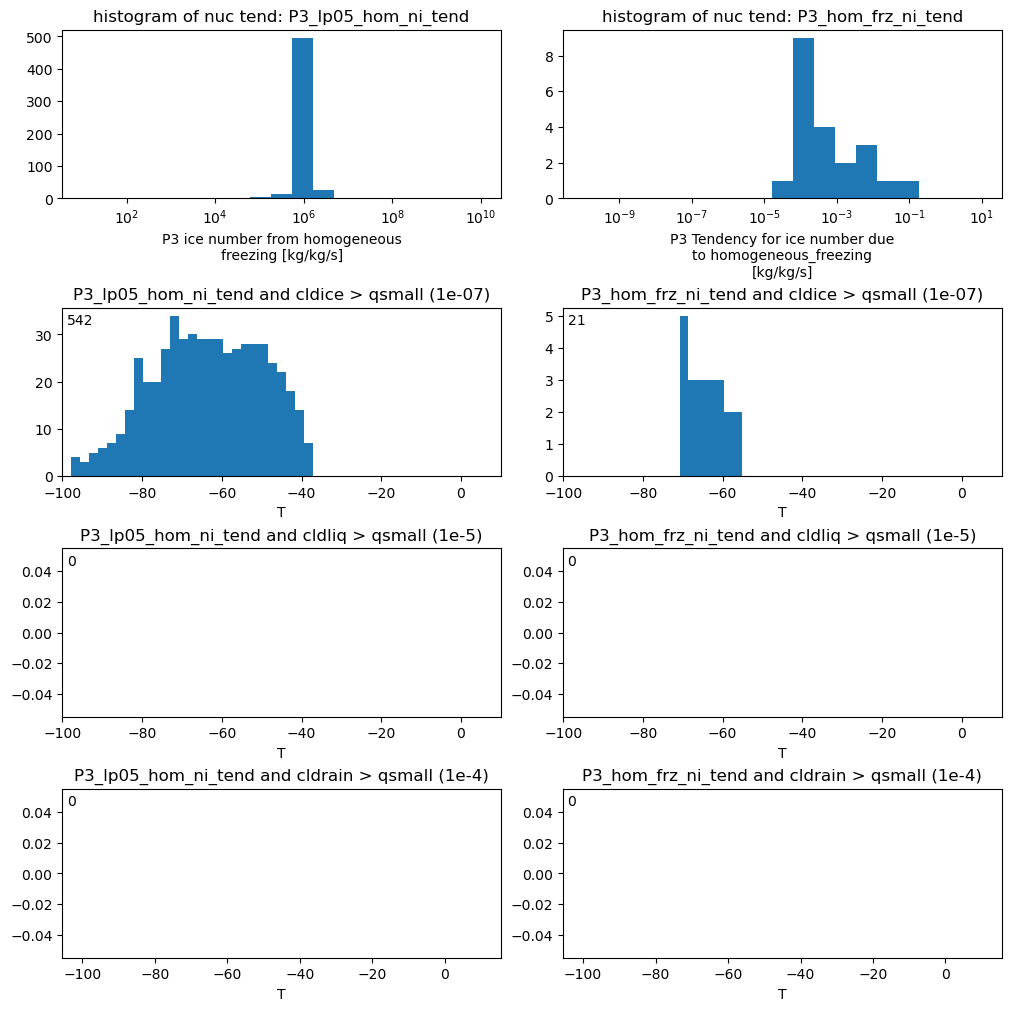

In [25]:
fig, ax = plt.subplots(4,2, figsize=(10,10), constrained_layout=True)
# LP05 HOM freezing
qsmall=1e-7
dsplot = ds.P3_lp05_hom_ni_tend.where(ds.CLDICE>qsmall)
dsplot.where(dsplot>qsmall).plot.hist(ax=ax[0,0], bins=np.logspace(1,10,20))
ax[0,0].set(xscale="log")
temp = ds['T'].where((ds.CLDICE>qsmall)&(ds.P3_lp05_hom_ni_tend>qsmall))
ax[1,0].annotate(temp.count().values, xy=(0.01,0.9), xycoords="axes fraction")
(temp-273.15).plot.hist(ax=ax[1,0], bins=np.linspace(-100,10,50))
temp = ds['T'].where((ds.CLDLIQ>1e-5)&(ds.P3_lp05_hom_ni_tend>qsmall))
ax[2,0].annotate(temp.count().values, xy=(0.01,0.9), xycoords="axes fraction")
(temp-273.15).plot.hist(ax=ax[2,0], bins=np.linspace(-100,10,50))
temp = ds['T'].where((ds.RAINQM>1e-4)&(ds.P3_lp05_hom_ni_tend>qsmall))
ax[3,0].annotate(temp.count().values, xy=(0.01,0.9), xycoords="axes fraction")
(temp-273.15).plot.hist(ax=ax[3,0], bins=np.linspace(-100,10,50))
ax[0,0].set(title="histogram of nuc tend: P3_lp05_hom_ni_tend")
ax[1,0].set(title=f"P3_lp05_hom_ni_tend and cldice > qsmall ({qsmall})")
ax[2,0].set(title=f"P3_lp05_hom_ni_tend and cldliq > qsmall (1e-5)")
ax[3,0].set(title=f"P3_lp05_hom_ni_tend and cldrain > qsmall (1e-4)")
# P3 homogeneous_freezing
dsplot = ds.P3_hom_frz_ni_tend.where(ds.CLDICE>qsmall)
dsplot.where(dsplot>qsmall).plot.hist(ax=ax[0,1], bins=np.logspace(-10,1,20))
ax[0,1].set(xscale="log")
temp = ds['T'].where((ds.CLDICE>qsmall)&(ds.P3_hom_frz_ni_tend>qsmall))
ax[1,1].annotate(temp.count().values, xy=(0.01,0.9), xycoords="axes fraction")
(temp-273.15).plot.hist(ax=ax[1,1], bins=np.linspace(-100,10,50))
temp = ds['T'].where((ds.CLDLIQ>1e-5)&(ds.P3_hom_frz_ni_tend>qsmall))
ax[2,1].annotate(temp.count().values, xy=(0.01,0.9), xycoords="axes fraction")
(temp-273.15).plot.hist(ax=ax[2,1], bins=np.linspace(-100,10,50))
temp = ds['T'].where((ds.RAINQM>1e-4)&(ds.P3_hom_frz_ni_tend>qsmall))
ax[3,1].annotate(temp.count().values, xy=(0.01,0.9), xycoords="axes fraction")
(temp-273.15).plot.hist(ax=ax[3,1], bins=np.linspace(-100,10,50))
ax[0,1].set(title="histogram of nuc tend: P3_hom_frz_ni_tend")
ax[1,1].set(title=f"P3_hom_frz_ni_tend and cldice > qsmall ({qsmall})")
ax[2,1].set(title=f"P3_hom_frz_ni_tend and cldliq > qsmall (1e-5)")
ax[3,1].set(title=f"P3_hom_frz_ni_tend and cldrain > qsmall (1e-4)")

for i in range(1,3):
    for j in range(2):
        ax[i,j].set(xlim=[-100,10])

plt.show()